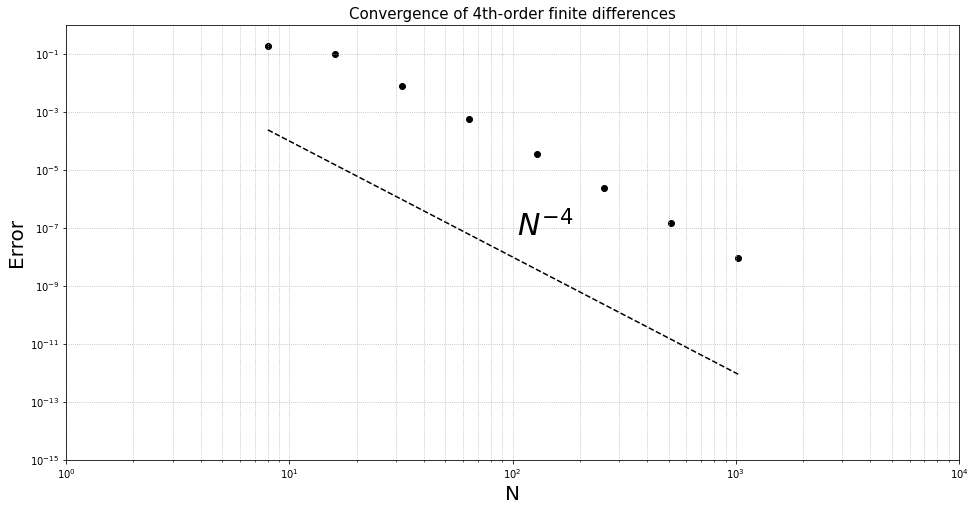

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix as coo
from matplotlib import pyplot as plt

N_vec = np.power(2, range(3,10 +1))
plt.figure(figsize=(16,8))

for N in N_vec:

  h = 2 * np.pi / N
  x = - np.pi + np.matrix(range(1,N + 1)).T * h
  
  u_array = []
  for i in np.array(x.T):
    u_val = np.power(np.e,np.sin(i)**2)
    u_array.extend(u_val)
  
  u = np.matrix(u_array).T
  uprime = np.matrix(2*np.array(np.sin(x))*np.array(np.cos(x)) * np.array(u))

  e = np.ones(N)
  row = np.array(range(0,N))
  col = np.array(range(1, N))
  col = np.append(col,0)
  data = 2/3 * e
  D = coo((data, (row,col)), shape=(N,N)).toarray()
  col_2 = np.array(range(2,N))
  col_2 = np.append(col_2, [0,1])
  data_2 = -1/12 * e
  D_2 = coo((data_2, (row,col_2)), shape=(N,N)).toarray()

  matrix = D + D_2
  matrix = 1/h * (matrix - matrix.T)

  error_matrix = matrix * u - uprime
  error = error_matrix.sum(axis=1).max()

  plt.scatter(N,error,color='black')

plt.plot(N_vec,1/ N_vec ** 4,color='black',linestyle = '--')
plt.ylim(10**(-15), 10**0)
plt.xlim(10**0,10**4)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both',linestyle=':')
plt.text(105, 5*10**(-8), r'$N^{-4}$',fontsize=30)
plt.xlabel('N',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title('Convergence of 4th-order finite differences',fontsize = 15)

plt.show()